In [48]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [50]:
col = df.columns
col

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [51]:
df.corr()['DEATH_EVENT'].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

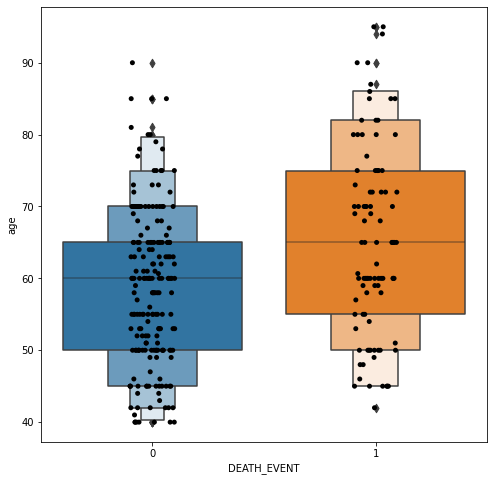

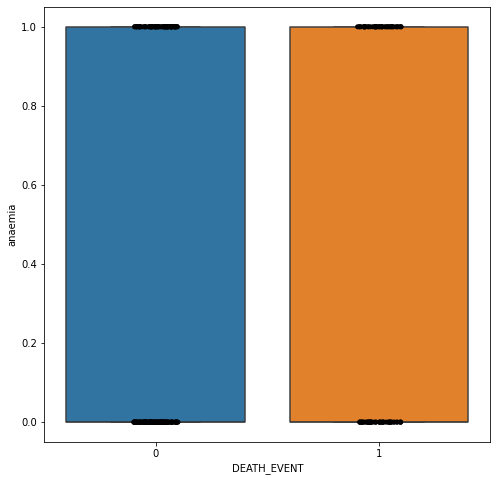

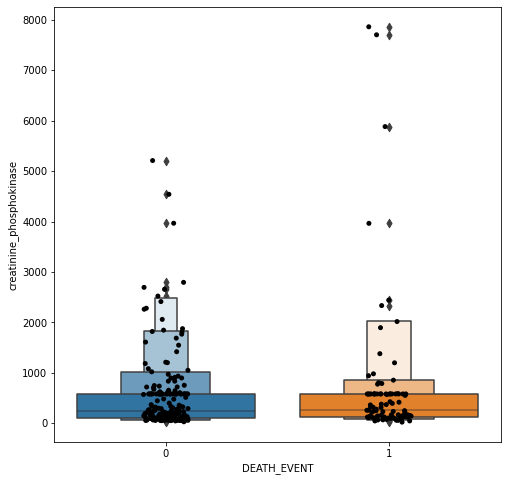

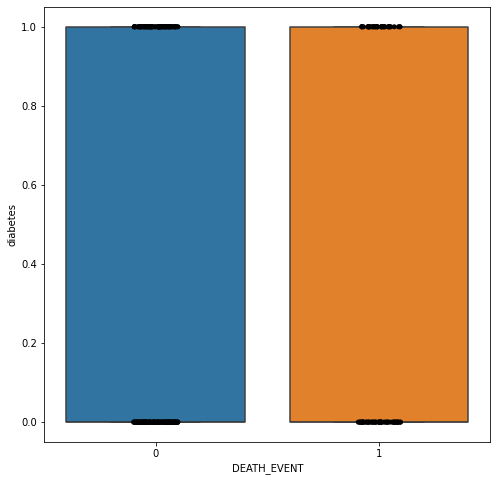

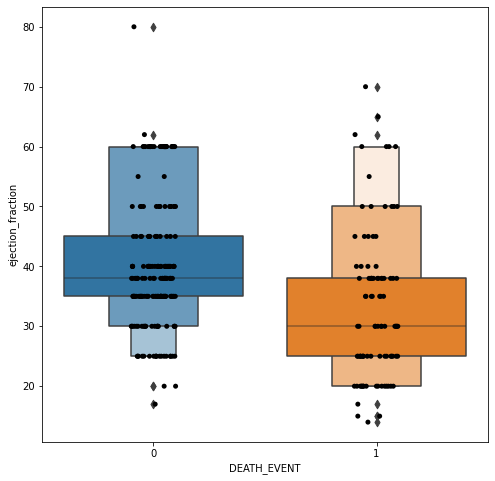

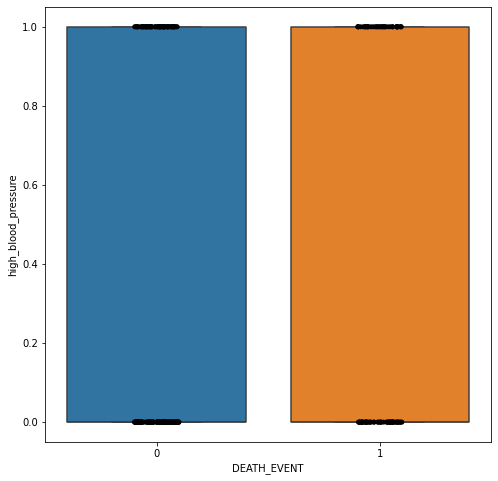

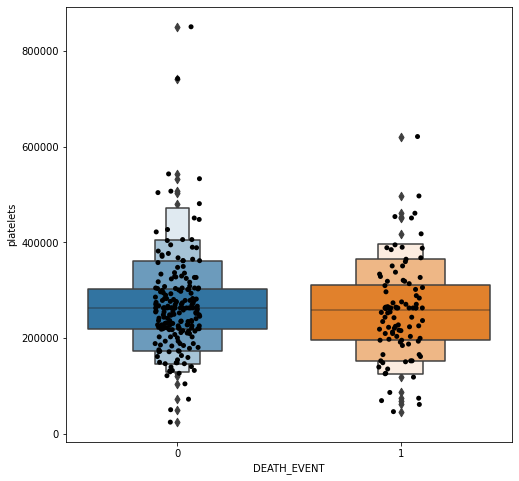

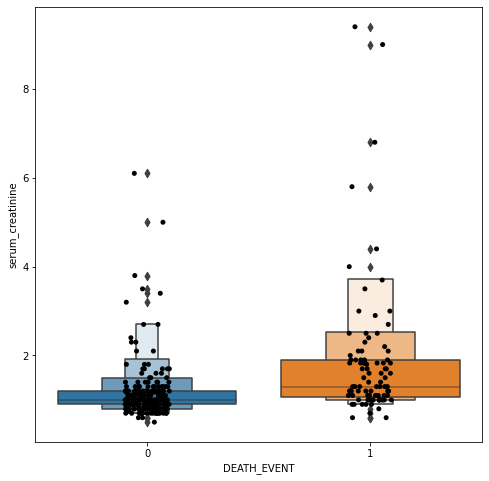

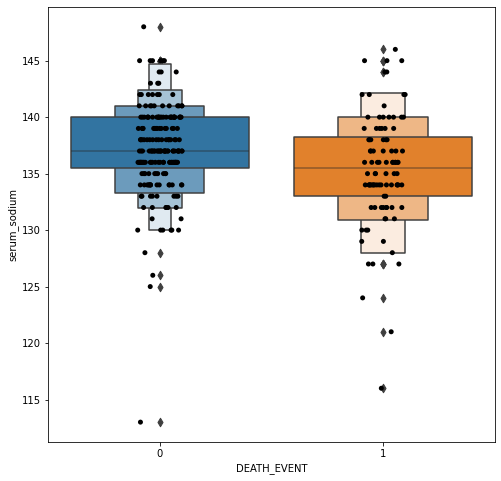

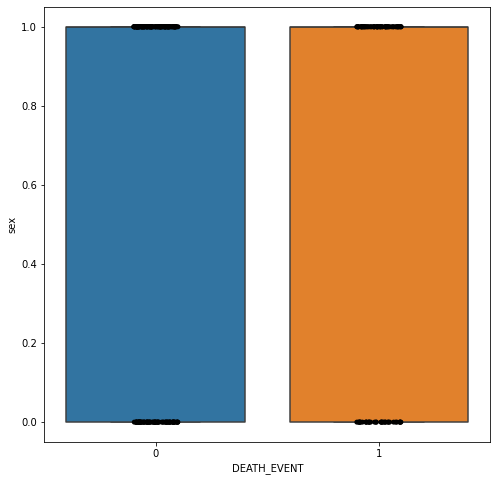

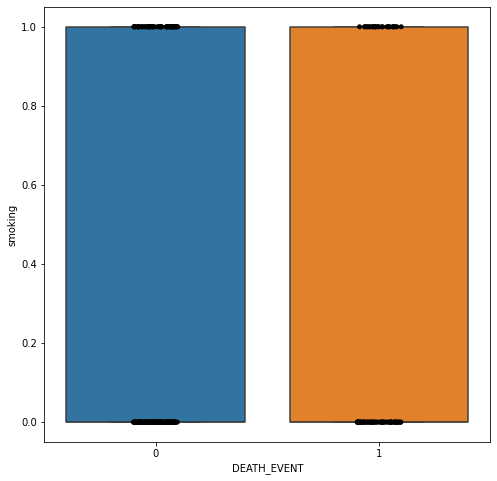

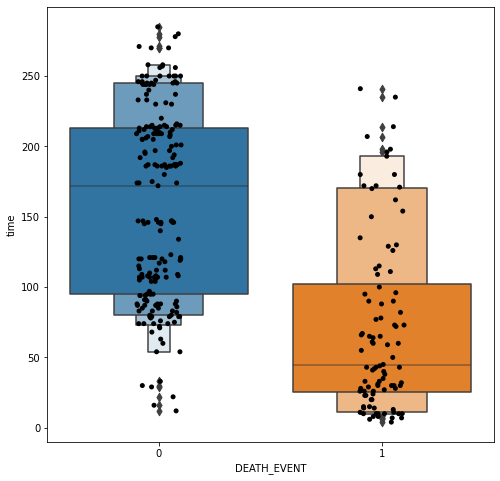

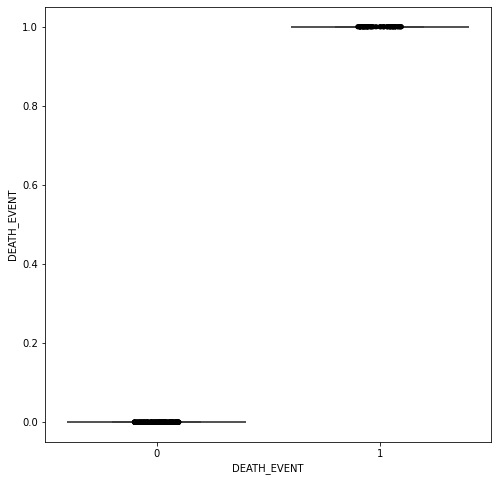

In [52]:
for i in df.columns:
  plt.figure(figsize=(8,8))
  sns.boxenplot(x = df['DEATH_EVENT'],y=df[i])
  sns.stripplot(x = df['DEATH_EVENT'],y=df[i],color='BLACK')
  plt.show

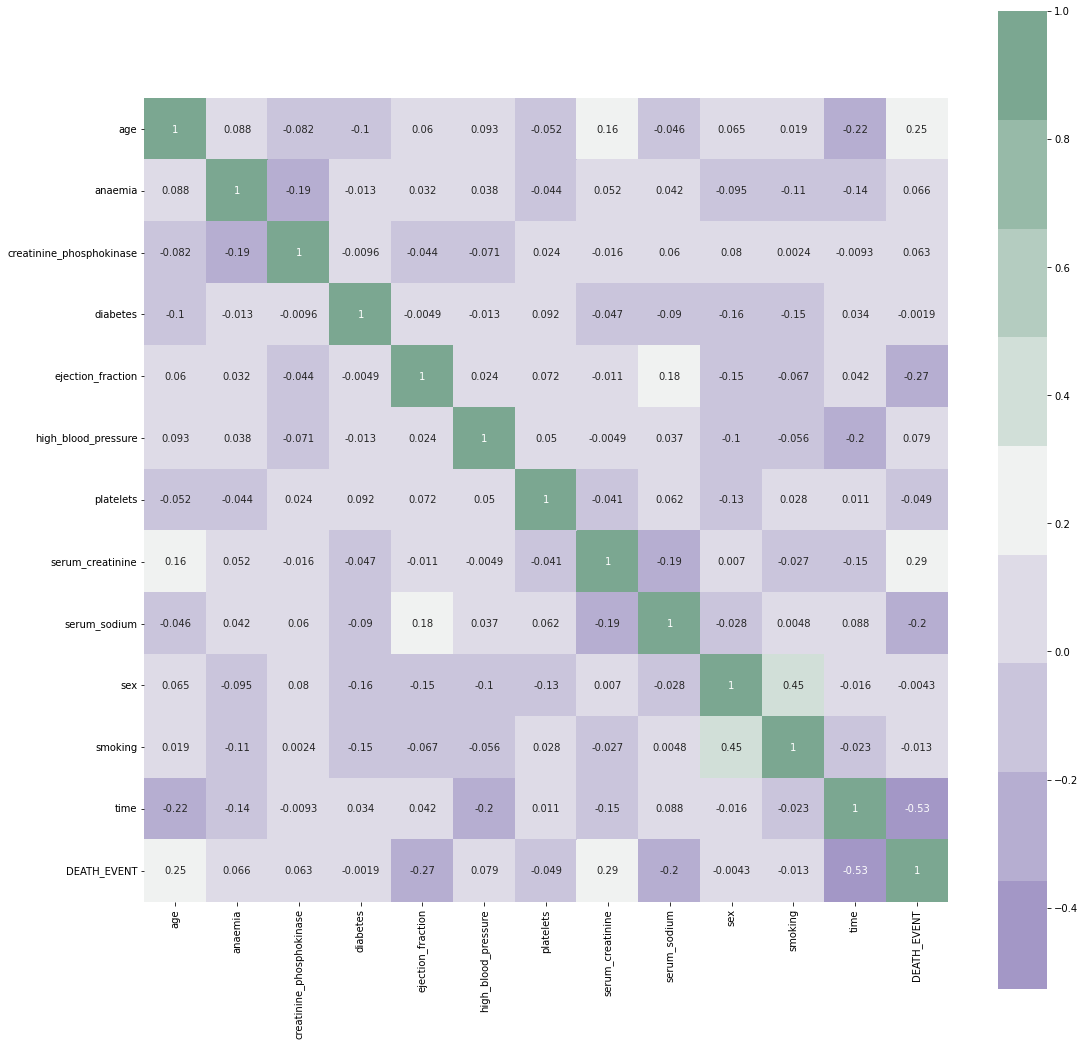

In [53]:
corrmat = df.corr()
cmap = sns.diverging_palette(275,150,s=40,l=65,n=9)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap=cmap,annot=True, square=True)

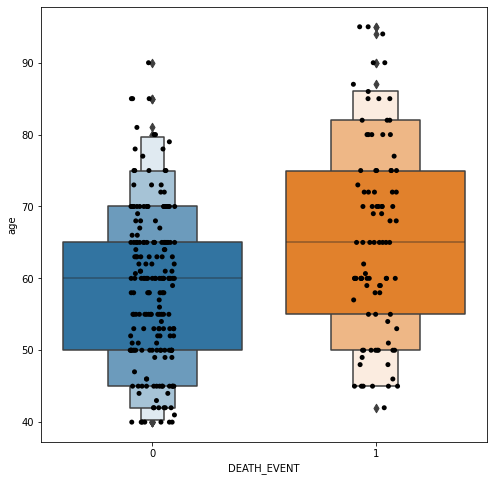

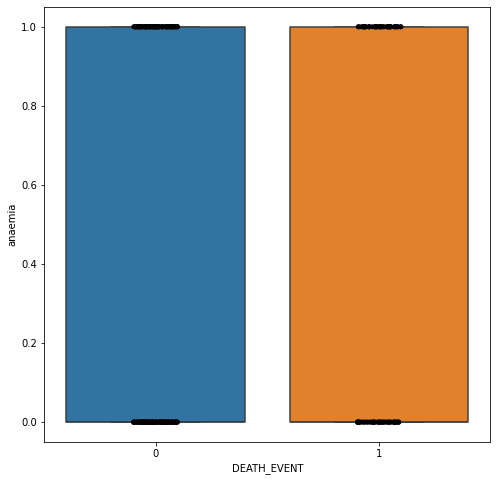

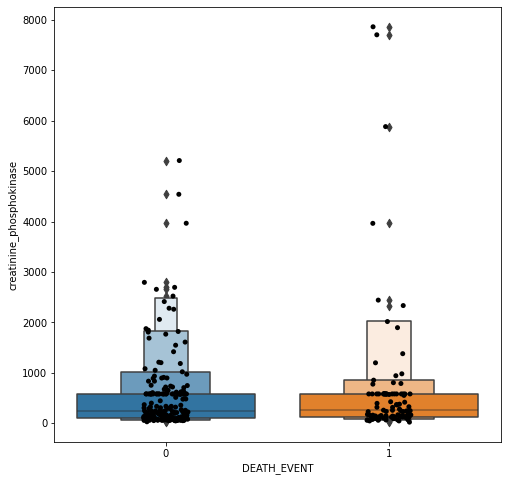

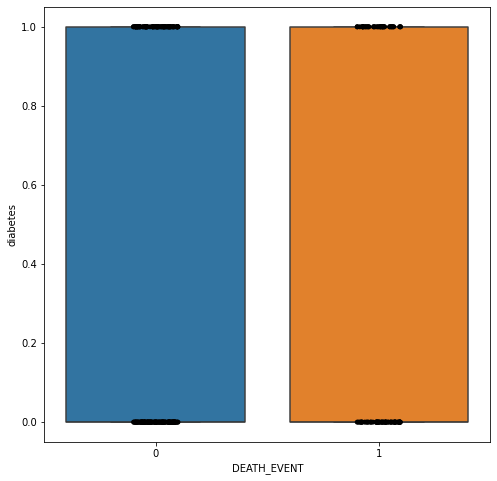

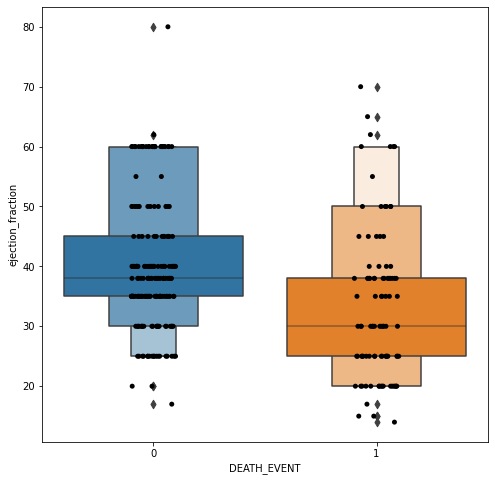

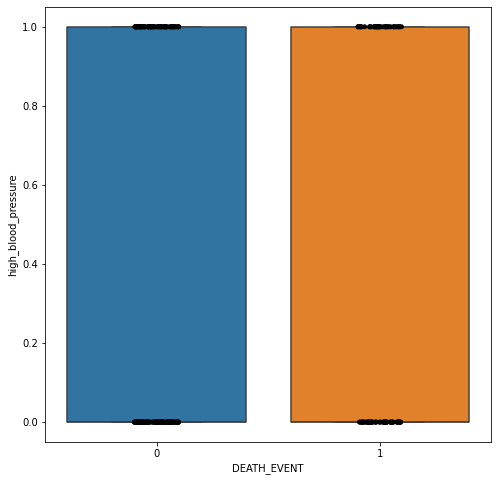

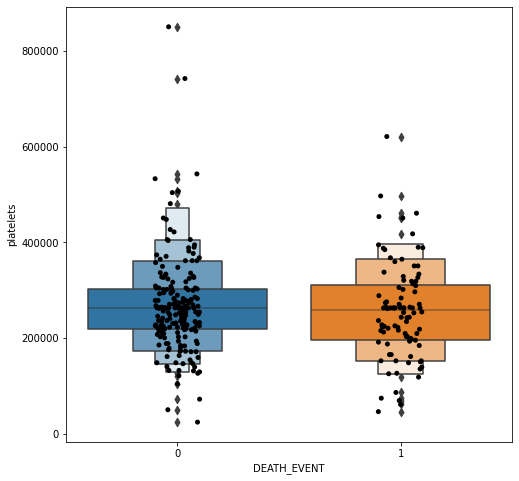

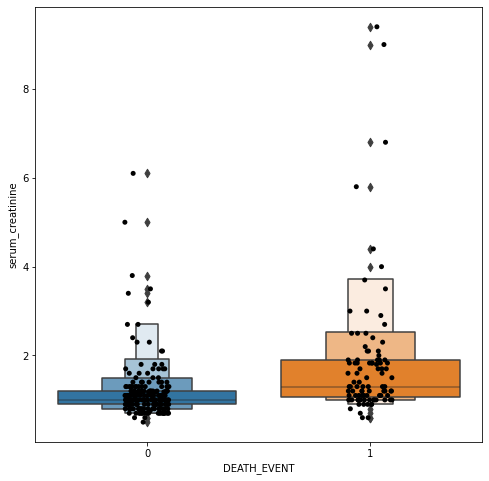

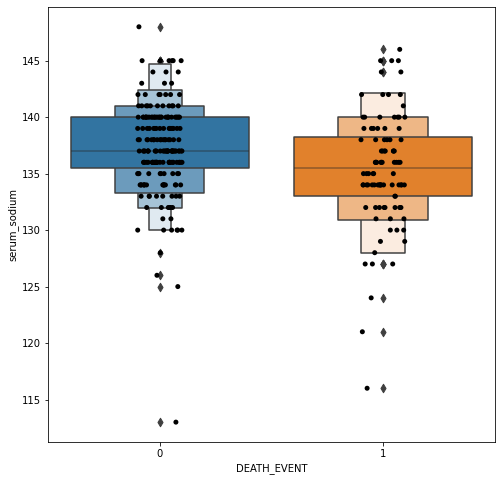

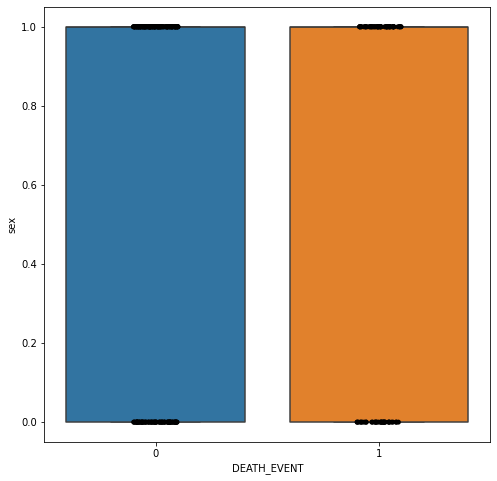

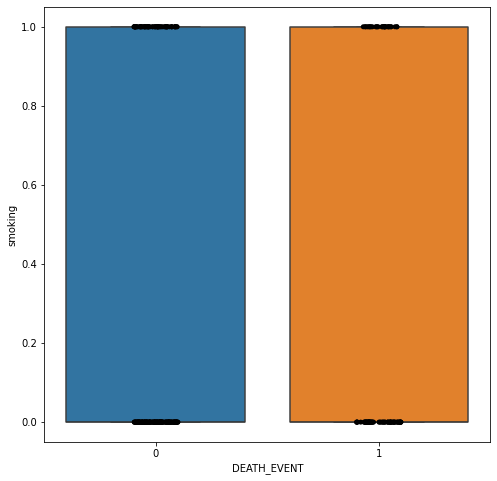

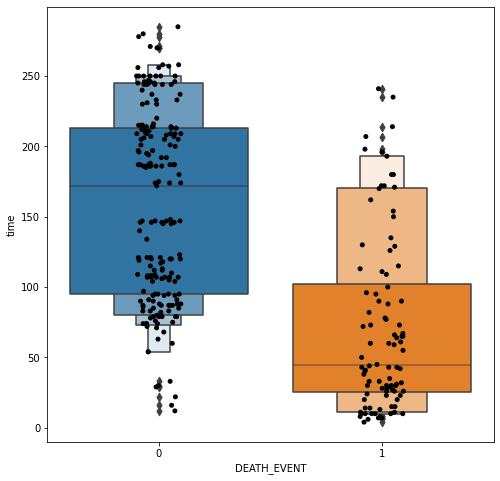

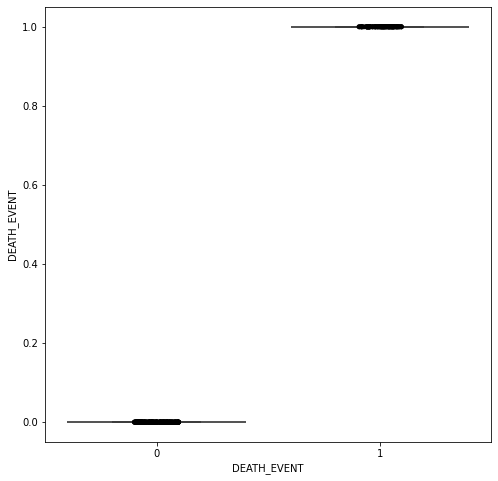

In [54]:
for i in df.columns:
  plt.figure(figsize=(8,8))
  sns.boxenplot(x = df['DEATH_EVENT'],y=df[i])
  sns.stripplot(x = df['DEATH_EVENT'],y=df[i],color='BLACK')
  plt.show

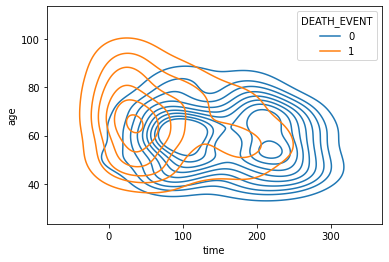

In [55]:
sns.kdeplot(x=df['time'],y=df['age'],hue=df['DEATH_EVENT'])

In [56]:
x = df.drop(['DEATH_EVENT'],axis=1)
y = df['DEATH_EVENT']

In [57]:
col = ['age',	'anaemia',	'creatinine_phosphokinase',	'diabetes',	'ejection_fraction',	'high_blood_pressure',	'platelets',	'serum_creatinine',	'serum_sodium',	'sex',	'smoking',	'time'	]

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x,columns=col)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=7)

In [62]:
from keras import callbacks
from keras import Sequential
from keras.layers import Dense, Dropout
# from keras.optimizers import SGD

In [63]:
earlystopping = callbacks.EarlyStopping(
    min_delta =0.0001, patience = 20, restore_best_weights=True
)

In [75]:
model = Sequential()

In [82]:
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=12))
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))


In [83]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
history = model.fit(x_train,y_train,batch_size=32,epochs=500,callbacks=[earlystopping],validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 1s 45ms/step - loss: 0.6927 - accuracy: 0.6480 - val_loss: 0.6918 - val_accuracy: 0.6667
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6916 - accuracy: 0.6480 - val_loss: 0.6905 - val_accuracy: 0.6667
Epoch 3/500
6/6 [==============================] - 0s 13ms/step - loss: 0.6903 - accuracy: 0.6480 - val_loss: 0.6890 - val_accuracy: 0.6667
Epoch 4/500
6/6 [==============================] - 0s 13ms/step - loss: 0.6888 - accuracy: 0.6480 - val_loss: 0.6872 - val_accuracy: 0.6667
Epoch 5/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6871 - accuracy: 0.6480 - val_loss: 0.6849 - val_accuracy: 0.6667
Epoch 6/500
6/6 [==============================] - 0s 13ms/step - loss: 0.6854 - accuracy: 0.6480 - val_loss: 0.6821 - val_accuracy: 0.6667
Epoch 7/500
6/6 [==============================] - 0s 11ms/step - loss: 0.6815 - accuracy: 0.6480 - val_loss: 0.6786 - val_accuracy: 0.6667
Epoch 8/500
6/6 [====

In [85]:
val_accuracy = np.mean(history.history['val_accuracy'])
print(val_accuracy*100)

80.1364534256751


In [87]:
y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)
np.set_printoptions()